Title: AI Placement Predictor
Description: This project predicts whether a student will get placed based on their academic scores, attendance, project performance, and communication skills using machine learning models.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv(r".......\data\student_placement_predictor_dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cp055\AppData\Local\Temp\ipykernel_21968\4085921996.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("....\data\student_placement_predictor_dataset.csv")
C:\Users\cp055\AppData\Local\Temp\ipykernel_21968\4085921996.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("....\data\student_placement_predictor_dataset.csv")


FileNotFoundError: [Errno 2] No such file or directory: '....\\data\\student_placement_predictor_dataset.csv'

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Student_ID                   0
Name                         0
Maths                        0
Python                       0
SQL                          0
Attendance                   0
Mini_Projects                0
Communication_Score          0
Placement_Readiness_Score    0
Placed                       0
dtype: int64

In [ ]:
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

In [38]:
df = df.drop("Name", axis=1)

KeyError: "['Name'] not found in axis"

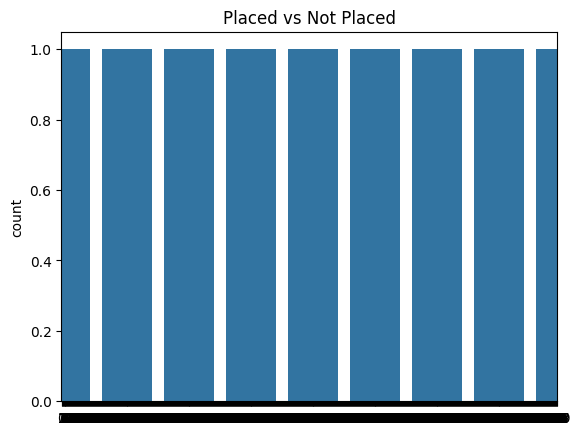

In [39]:
sns.countplot(df["Placed"])
plt.title("Placed vs Not Placed")
plt.show()

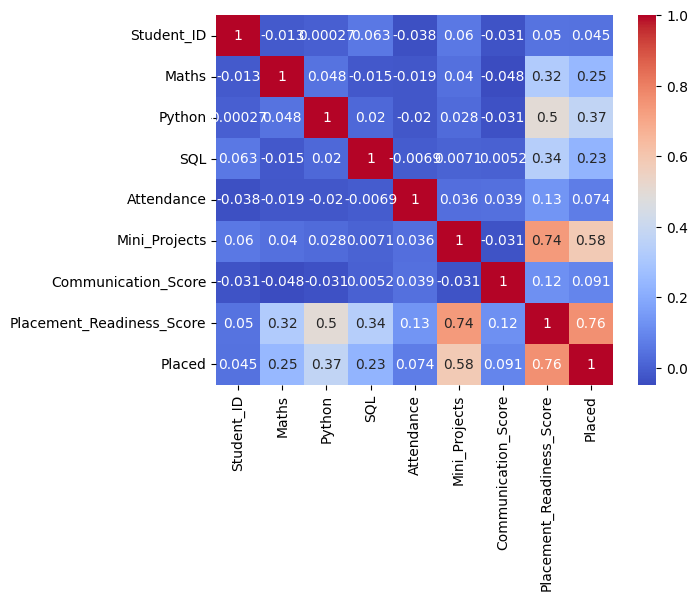

In [40]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


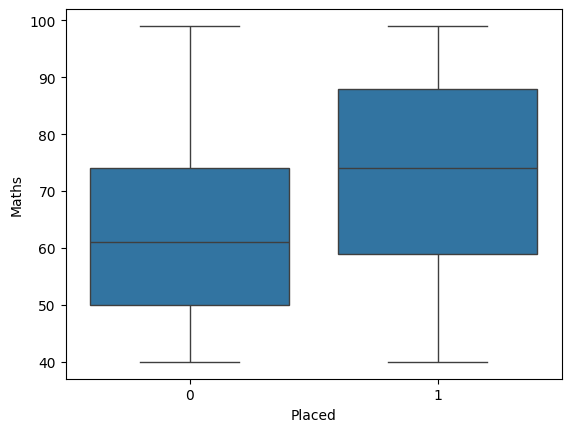

In [41]:
sns.boxplot(x="Placed", y="Maths", data=df)
plt.show()


In [42]:
df["Placed"] = df["Placed"].map({"No": 0, "Yes": 1})

In [43]:
df = pd.get_dummies(df, drop_first=True)

X = df.drop("Placed", axis=1)
y = df["Placed"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("LR Accuracy:", accuracy_score(y_test, y_pred_lr))


ValueError: Input y contains NaN.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))

RF Accuracy: 1.0


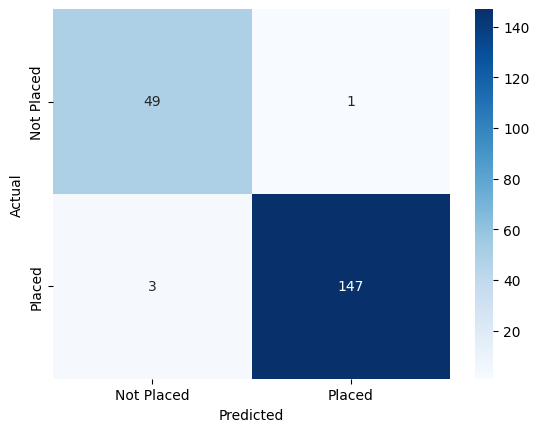

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Placed", "Placed"],
            yticklabels=["Not Placed", "Placed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred_lr, target_names=["Not Placed", "Placed"]))


              precision    recall  f1-score   support

  Not Placed       0.94      0.98      0.96        50
      Placed       0.99      0.98      0.99       150

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.98      0.98       200

